<h1>Analysis of the Tunes Dataset</h1>

In [1]:
# Imports
from Tunes_cleaned import tunes as raw_tunes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=10) 

In [2]:
tunes = pd.DataFrame.from_dict(raw_tunes, orient='index')

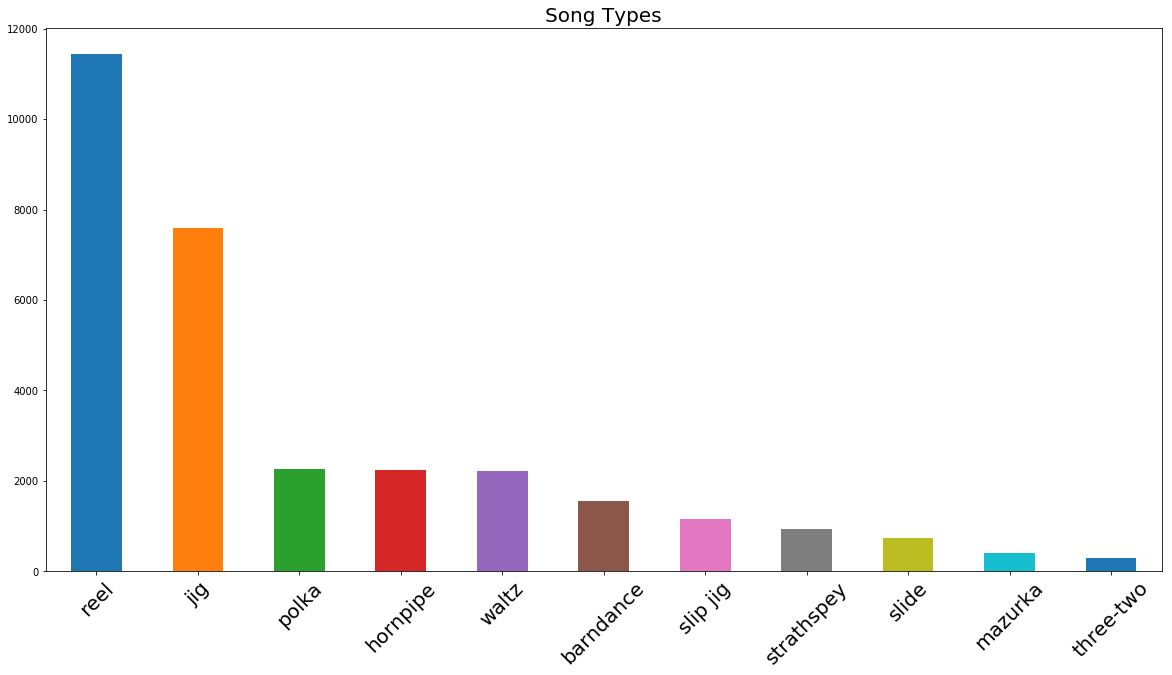

In [3]:
tunes['type'].value_counts().plot(kind='bar', figsize=(20,10), rot=45)
plt.title("Song Types", fontsize=20)
plt.show()

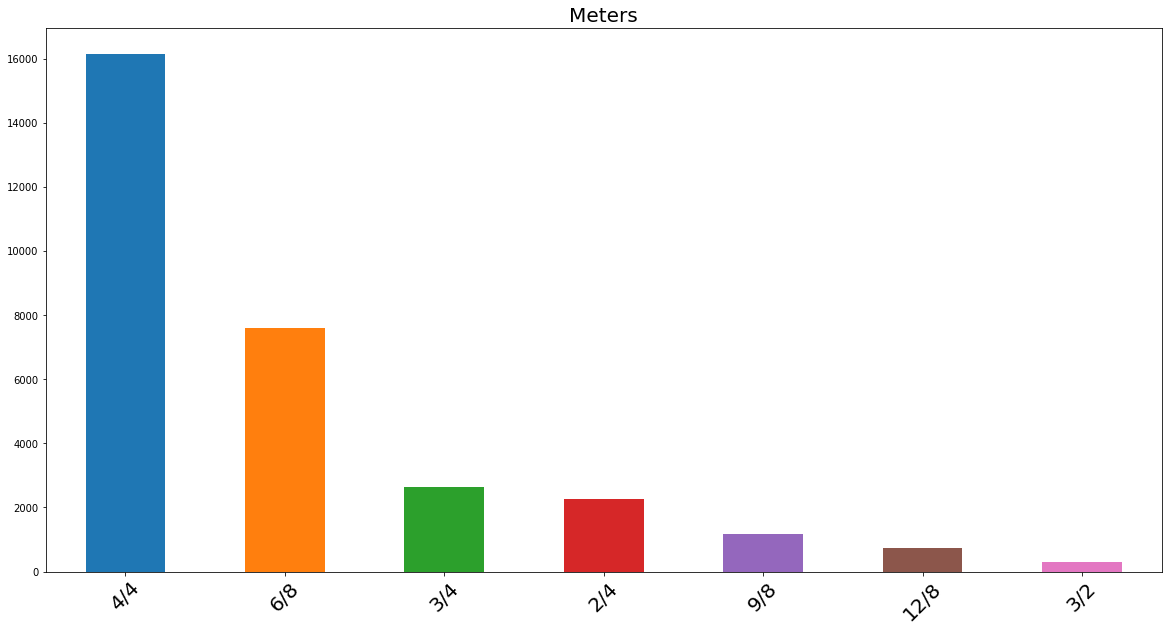

In [4]:
tunes['meter'].value_counts().plot(kind='bar', figsize=(20,10), rot=45)
plt.title("Meters", fontsize=20)
plt.show()

<h1>Key Analysis</h1>
Traditional music has a fairly limited span of keys, which is imposed by the nature of the instruments used. For example the Uilleann Pipes are confined to a single key (Typically D major).

<h3>Number of modes</h3>

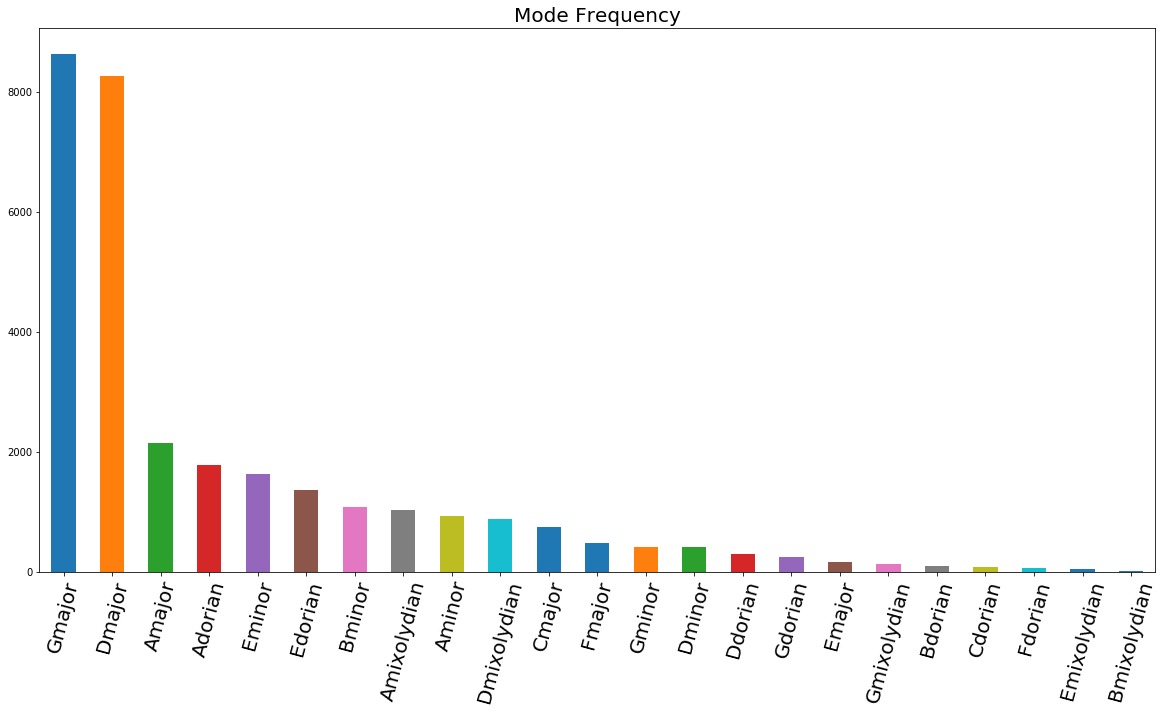

In [5]:
tunes['tonic'] = tunes['mode'].str[0]
tunes['mode'].value_counts().plot(kind='bar', figsize=(20,10), rot=75)
plt.title("Mode Frequency", fontsize=20)
plt.show()

<h3>Number of Tonic Keys</h3>

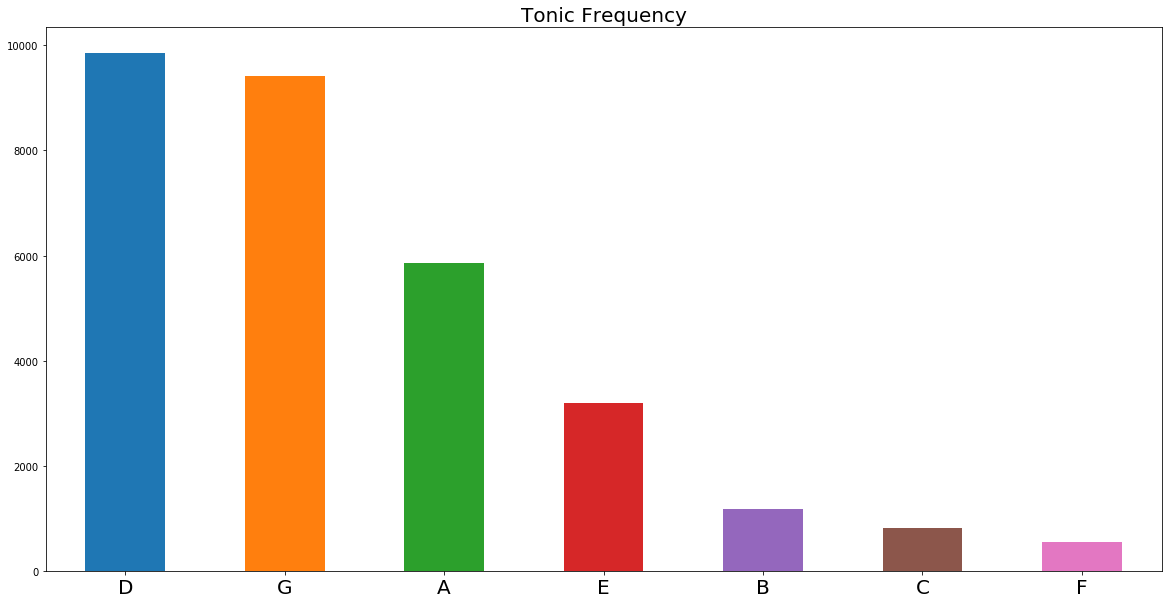

In [6]:
tunes['tonic'].value_counts().plot(kind='bar', figsize=(20,10), rot=0)
plt.title("Tonic Frequency", fontsize=20)
plt.show()

<h2>Number of Notes</h2>
Please note that as of the time of writing, this does not take repeat sections into account

In [7]:
tunes['notes'] = tunes['abc'].str.replace('[^a-zA-Z\',]+','')

In [8]:
notes = {
    'C' : 60,
    'D' : 61,
    'E' : 62,
    'F' : 63,
    'G' : 64,
    'A' : 65,
    'B' : 66,
    'c' : 67,
    'd' : 68,
    'e' : 69,
    'f' : 70,
    'g' : 71,
    'a' : 72,
    'b' : 73
}

In [9]:
def abc_to_nums(abc):
    nums = []
    for letter in abc:
        if letter in notes:
            nums.append(notes[letter])
        elif len(nums)==0:
            continue
        elif letter is "'":
            nums[-1]+=7
        elif letter is ",":
            nums[-1]-=7     
    return nums

In [10]:
tunes['note_nums'] = tunes['notes'].apply(abc_to_nums)
tunes['num_notes'] = tunes['note_nums'].str.len()
tunes['num_notes'].describe()

count    30840.000000
mean       120.900065
std         69.965969
min          0.000000
25%         86.000000
50%        111.000000
75%        136.000000
max       3246.000000
Name: num_notes, dtype: float64

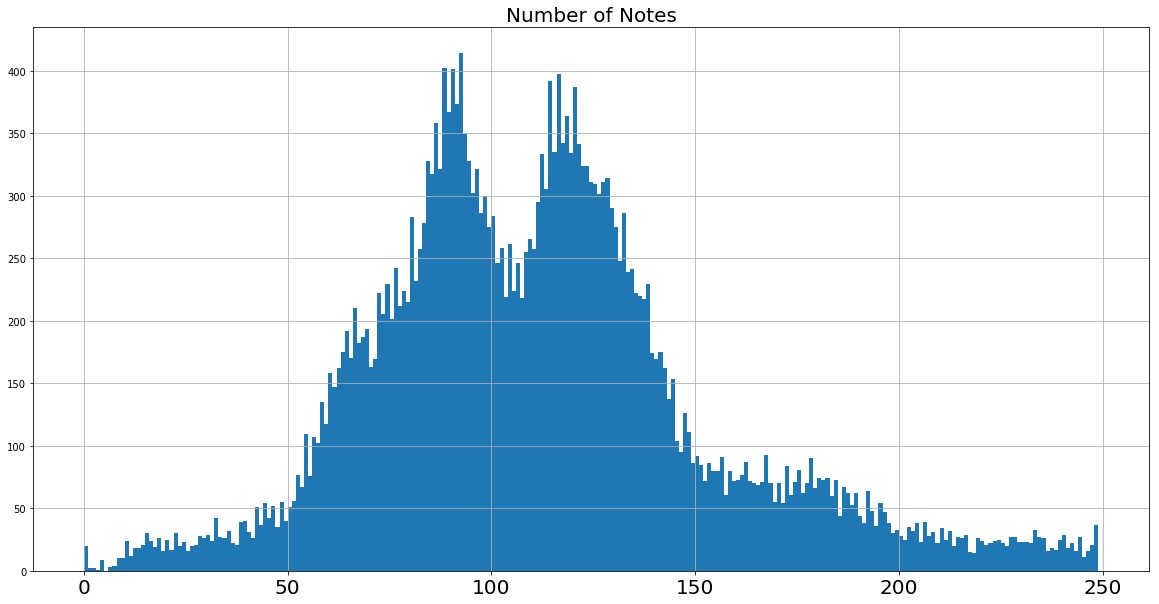

In [11]:
fig = plt.figure(figsize = (20,10))
tunes['num_notes'].hist(bins=range(0,250,1))
plt.title("Number of Notes", fontsize=20)
plt.show()

<h3>Melodic Range</h3>
Melodic range is the intervalic distance between the highest and lowest notes in a melody. It is also called 'Tessitura'. A standard classical tessitura is about 2 octaves (16 notes), but this is for trained musicians. We can see that in traditional music, lower tessituras are more common.

In [12]:
def calc_range(arr):
    if arr==[]:
        return 0
    return max(arr) - min(arr)

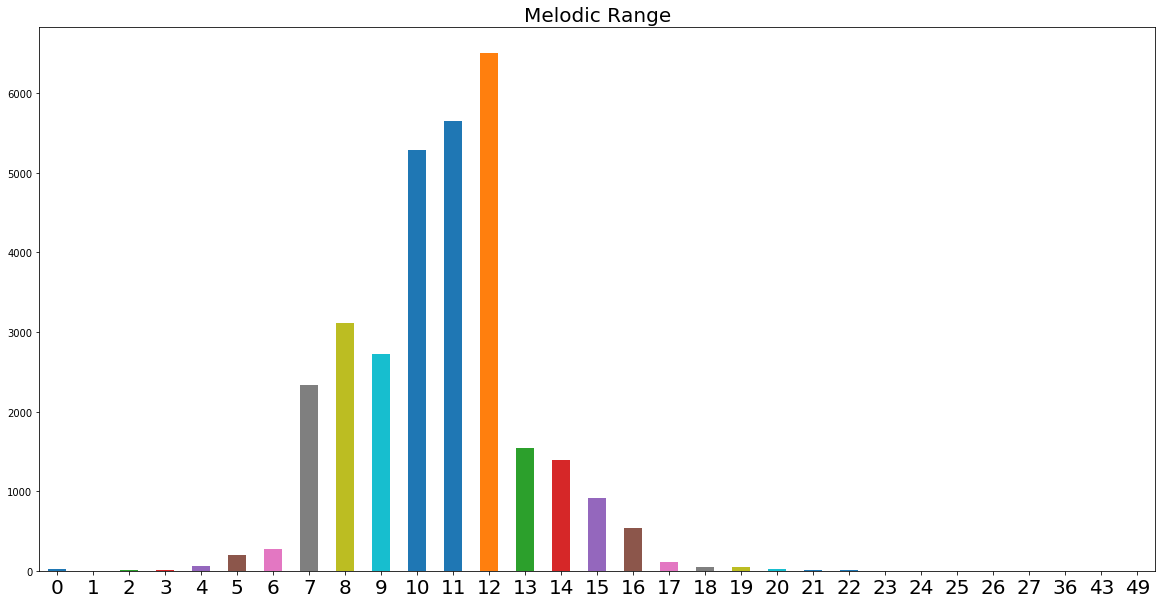

In [13]:
tunes['range'] = tunes['note_nums'].apply(calc_range)
fig = plt.figure(figsize = (20,10))
tunes['range'].value_counts().sort_index().plot(kind='bar', figsize=(20,10), rot=0)
plt.title("Melodic Range", fontsize=20)
plt.show()

<h1>Pruning The Dataset</h1>
<h3>Removing All Songs Below a Certain Length

In [14]:
def remove_small_strings(frame, len):
    result = frame.drop(frame[frame['num_notes']<len].index)
    return result.drop(result[result.abc.str.len()<len].index)

In [15]:
SHORTEST_STR = 32
tunes_clean = remove_small_strings(tunes, SHORTEST_STR)
print("{} entries removed".format(tunes.shape[0]-tunes_clean.shape[0]))

548 entries removed


<h3>Removing all songs with non-diatonic notes</h3>

In [16]:
def remove_non_diatonic(frame):
    return frame.drop(frame[frame['abc'].str.count('\^|_|=')>0].index)

In [17]:
tunes_clean = remove_non_diatonic(tunes_clean)
print("{} entries removed".format(tunes.shape[0]-tunes_clean.shape[0]))

9449 entries removed


<h3>Removing all songs with tuples</h3>

In [18]:
def remove_tuples(frame):
    return frame.drop(frame[frame['abc'].str.count('\(\d')>0].index)

In [19]:
tunes_clean = remove_tuples(tunes_clean)
print("{} entries removed".format(tunes.shape[0]-tunes_clean.shape[0]))

14375 entries removed


In [20]:
print("{} songs remain".format(tunes_clean.shape[0]))

16465 songs remain


<h1> To investigate:</h1>
Pickups 

4/4 and filtering

Reels and filtering

Fits the ABA format explicitly

check average note length

check how often notes deviate in time